# <span style="color:red"> NUMERICAL EXERCISES 03 </span>

## <span style="color:blue">Exercise 03.1 </span>

##### PLAIN VANILLA OPTION PRICING

In the exercise I determine the price at which it is convenient to pay for the European call/put option (fixed all parameters: delivery time, strike price, asset price, volatility, risk free interest rate).

The calculation requires sampling a particle moving in Geometric Brownian motion. This sampling is first done directly, then in discrete steps (it is a stochastic Markov process!).

The four graphs represent the stepwise estimation (on the sliding blocks) of the put/call option price with the two types of sampling. The simulation data are compared with the true value given by the Black-Scholes solution.

##### BLACK-SCHOLES SOLUTION

In [3]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


###### SIMULATION

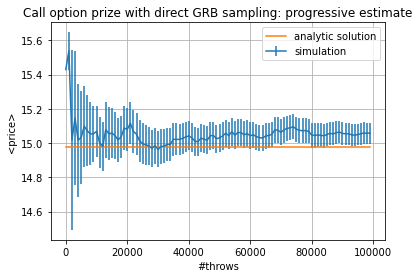

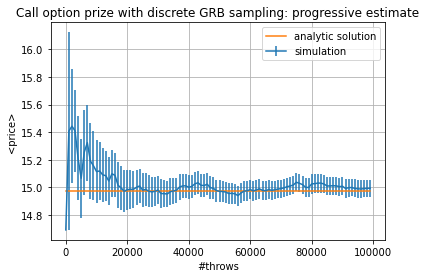

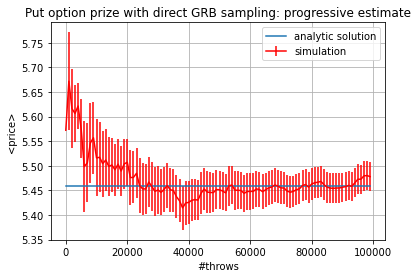

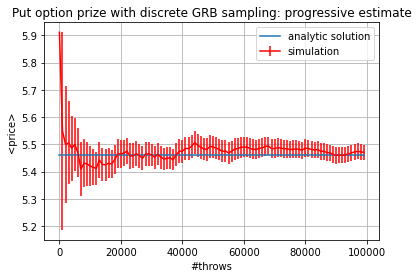

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

x = np.arange(N)      # [0,1,2,...,N-1]
z_call = np.ones(N)
z_put = np.ones(N)
z_call*=call
z_put*=put

x*=L # Number of throws = block * (Number of throws in each block)

sum_prog, err_prog = np.loadtxt("data/direct_call.txt", usecols =(0,1), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, label='simulation')
plt.xlabel('#throws')
plt.ylabel('<price>')
plt.title("Call option prize with direct GRB sampling: progressive estimate")
plt.grid(True)
plt.plot(x,z_call,label='analytic solution')
plt.legend()

plt.figure()

sum_prog, err_prog = np.loadtxt("data/discrete_call.txt", usecols =(0,1), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, label='simulation')
plt.xlabel('#throws')
plt.ylabel('<price>')
plt.title("Call option prize with discrete GRB sampling: progressive estimate")
plt.grid(True)
plt.plot(x,z_call,label='analytic solution')
plt.legend()

plt.figure()

sum_prog, err_prog = np.loadtxt("data/direct_put.txt", usecols =(0,1), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, label='simulation', color='r')
plt.xlabel('#throws')
plt.ylabel('<price>')
plt.title("Put option prize with direct GRB sampling: progressive estimate")
plt.grid(True)
plt.plot(x,z_put,label='analytic solution')
plt.legend()

plt.figure()

sum_prog, err_prog = np.loadtxt("data/discrete_put.txt", usecols =(0,1), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, label='simulation', color='r')
plt.xlabel('#throws')
plt.ylabel('<price>')
plt.title("Put option prize with discrete GRB sampling: progressive estimate")
plt.grid(True)
plt.plot(x,z_put,label='analytic solution')
plt.legend()

plt.show()

The two sampling methods are equivalent; therefore, it is not surprising that the errors are large equal. 
Since direct is $N_{step}$ times faster than discrete, it would be more convenient to use direct sampling.